In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
df['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


<Axes: >

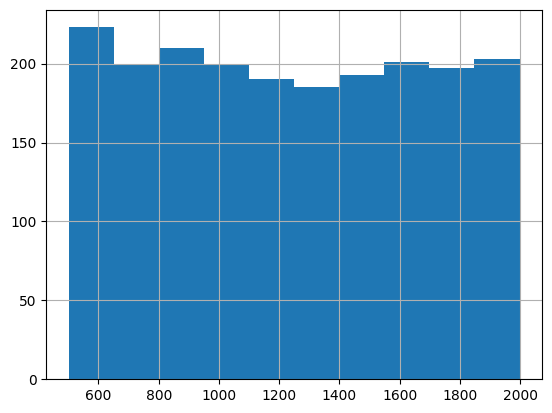

In [ ]:
df['battery_power'].hist()

In [ ]:
bins = [500, 800, 1200, 1600, 1998]
df['battery_grouped'] = pd.cut(df['battery_power'], bins).astype('str')
df['battery_grouped'] = pd.Categorical(df['battery_grouped'],
                                       ordered = True,
                                       categories = ['(500, 800]', '(800, 1200]', '(1200, 1600]', '(1600, 1998]'])

In [ ]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,battery_grouped
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,"(800, 1200]"
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,"(800, 1200]"
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,"(500, 800]"
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,"(500, 800]"
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,"(1600, 1998]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,"(500, 800]"
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,"(1600, 1998]"
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,"(1600, 1998]"
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,"(1200, 1600]"


<Axes: xlabel='battery_grouped', ylabel='Count'>

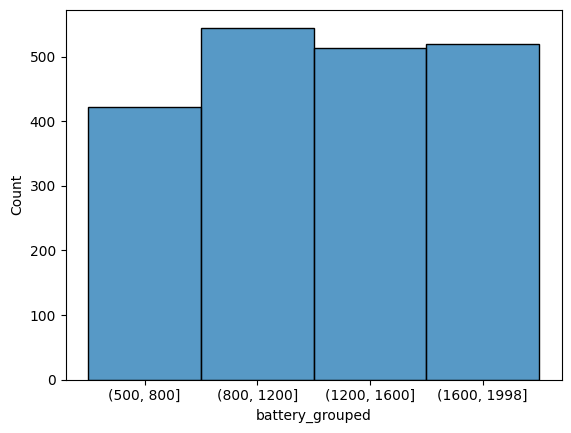

In [ ]:
import seaborn as sns
sns.histplot(data = df, x = 'battery_grouped')

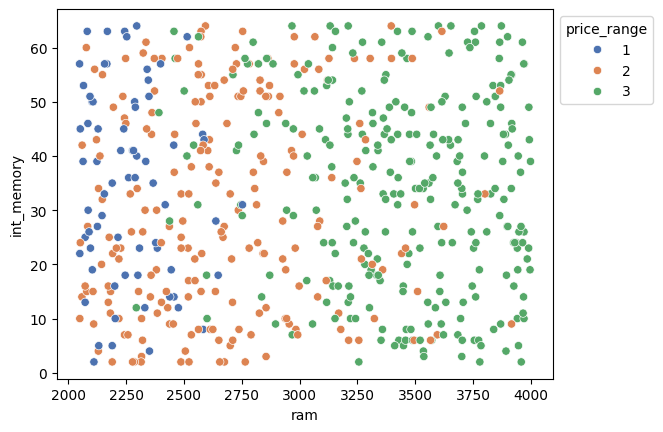

In [ ]:
selection = df[(df['four_g'] == 1) & (df['ram'] > 2048)]
g = sns.scatterplot(data = selection,
                x = 'ram',
                y = 'int_memory',
                hue = 'price_range',
                palette = 'deep')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
df['count'] = 1
df['int_memory_grouped'] = pd.cut(df['int_memory'], 5)
df.pivot_table(columns = ['price_range'],
               index = ['touch_screen', 'int_memory_grouped'],
               values = ['count'],
               aggfunc = 'count')

<ipython-input-45-505db270e3f7>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(columns = ['price_range'],


count            
price_range                         0   1   2   3
touch_screen int_memory_grouped                  
0            (1.938, 14.4]         53  49  56  52
             (14.4, 26.8]          46  43  53  50
             (26.8, 39.2]          47  56  52  53
             (39.2, 51.6]          35  51  49  50
             (51.6, 64.0]          57  40  55  47
1            (1.938, 14.4]         71  61  68  44
             (14.4, 26.8]          48  49  44  43
             (26.8, 39.2]          56  51  42  44
             (39.2, 51.6]          44  52  42  63
             (51.6, 64.0]          43  48  39  54

In [ ]:
df = pd.read_csv('dataset.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['price_range']),
                                                    df['price_range'],
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=0)
neigh.fit(X_train, y_train)
dtc.fit(X_train, y_train)
pred_neigh = neigh.predict(X_test)
pred_dtc = dtc.predict(X_test)
print("Accuracy neigh: ", accuracy_score(y_test, pred_neigh))
print("Accuracy tree: ", accuracy_score(y_test, pred_dtc))

Accuracy neigh:  0.932
Accuracy tree:  0.794


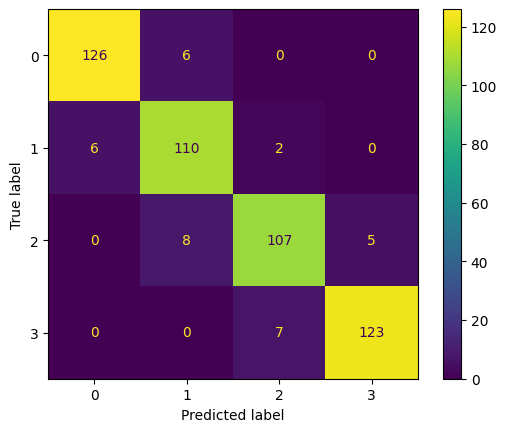

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_neigh = confusion_matrix(y_test, pred_neigh, labels=neigh.classes_)
disp_neigh = ConfusionMatrixDisplay(confusion_matrix=cm_neigh,
                              display_labels=neigh.classes_)
disp_neigh.plot()


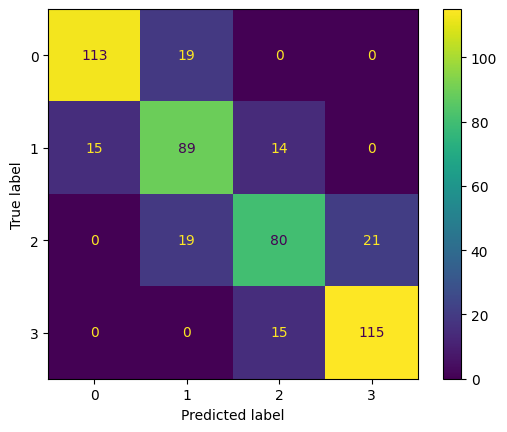

In [ ]:
cm_dtc = confusion_matrix(y_test, pred_dtc, labels=dtc.classes_)
disp_dtc = ConfusionMatrixDisplay(confusion_matrix=cm_dtc,
                              display_labels=dtc.classes_)
disp_dtc.plot()

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
pred_dummy = dummy_clf.predict(X_test)
print("Accuracy neigh: ", accuracy_score(y_test, pred_neigh))
print("Accuracy tree: ", accuracy_score(y_test, pred_dtc))
print("Accuracy dummy: ", accuracy_score(y_test, pred_dummy))

Accuracy neigh:  0.932
Accuracy tree:  0.794
Accuracy dummy:  0.236


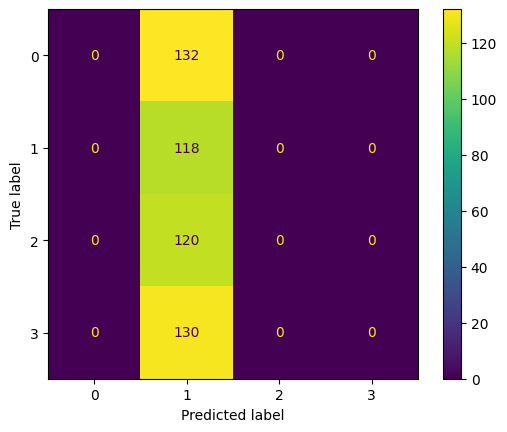

In [ ]:
cm_dummy = confusion_matrix(y_test, pred_dummy, labels=dummy_clf.classes_)
disp_dummy = ConfusionMatrixDisplay(confusion_matrix=cm_dummy,
                              display_labels=dummy_clf.classes_)
disp_dummy.plot()

In [ ]:
from sklearn.model_selection import cross_val_score
print("Accuracy neigh: ", cross_val_score(neigh, df.drop(columns = ['price_range']), df['price_range'], cv = 10).mean())
print("Accuracy dtc: ", cross_val_score(dtc, df.drop(columns = ['price_range']), df['price_range'], cv = 10).mean())
print("Accuracy dummy: ", cross_val_score(dummy_clf, df.drop(columns = ['price_range']), df['price_range'], cv = 10).mean())

Accuracy neigh:  0.9235000000000001
Accuracy dtc:  0.8385
Accuracy dummy:  0.25


In [ ]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_leaf':[1,3,5],
              'criterion':['gini', 'entropy', 'log_loss']}
clf_dtc = GridSearchCV(dtc, parameters)
clf_dtc.fit(X_train, y_train)
pred_best_dtc = clf_dtc.best_estimator_.predict(X_test)
print("Accuracy tree: ", accuracy_score(y_test, pred_best_dtc))

Accuracy tree:  0.858


In [ ]:
high_df = df[df.corr()['price_range'].sort_values()[::-1].head(6).index]
X_train, X_test, y_train, y_test = train_test_split(high_df.drop(columns = ['price_range']),
                                                    high_df['price_range'],
                                                    test_size=0.25,
                                                    random_state=42)
dtc.fit(X_train, y_train)
neigh.fit(X_train, y_train)
pred_neigh = neigh.predict(X_test)
pred_dtc = dtc.predict(X_test)
print("Accuracy neigh: ", accuracy_score(y_test, pred_neigh))
print("Accuracy tree: ", accuracy_score(y_test, pred_dtc))

Accuracy neigh:  0.932
Accuracy tree:  0.85


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['price_range']),
                                                    df['price_range'],
                                                    test_size=0.25,
                                                    random_state=42)
ct = ColumnTransformer(transformers = [('ss', StandardScaler(), ['int_memory', 'ram', 'talk_time']),
                                       ('kbins', KBinsDiscretizer(n_bins = 5), ['mobile_wt', 'battery_power'])],
                       remainder = 'passthrough')
pipe = Pipeline(steps = [('ct', ct),
                         ('dtc', DecisionTreeClassifier(criterion = 'entropy',
                                                        min_samples_leaf = 3))])
pipe.fit(X_train, y_train)
pred_pipe = pipe.predict(X_test)
print("Accuracy pipe: ", accuracy_score(y_test, pred_pipe))

Accuracy pipe:  0.832


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
pipe = Pipeline(steps = [('ct', ct),
                         ('kbest', SelectKBest(f_classif)),
                         ('dtc', DecisionTreeClassifier(random_state = 0,
                                                        criterion = 'entropy',
                                                        min_samples_leaf = 3))])


In [ ]:
parameters = {'kbest__k':[5,7,10,12],
              'ct__kbins__n_bins':[3,5,7]}
best_pipe = GridSearchCV(pipe, parameters)
best_pipe.fit(X_train, y_train)
pred_pipe = best_pipe.best_estimator_.predict(X_test)
print("Accuracy pipe: ", accuracy_score(y_test, pred_pipe))

Accuracy pipe:  0.852


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion
fu = FeatureUnion([('ct', ct),
                   ('svd', TruncatedSVD(n_components=5))])
pipe = Pipeline(steps = [('fu', fu),
                         ('dtc', DecisionTreeClassifier(random_state=0,
                                                        criterion = 'entropy',
                                                        min_samples_leaf = 3))])
pipe.fit(X_train, y_train)
pred_pipe = pipe.predict(X_test)
print("Accuracy pipe: ", accuracy_score(y_test, pred_pipe))

Accuracy pipe:  0.934


In [ ]:
parameters = {'fu__svd__n_components':[4,5,6,7]}
best_pipe = GridSearchCV(pipe, parameters)
best_pipe.fit(X_train, y_train)
pred_best_pipe = best_pipe.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred_best_pipe))

0.934


In [ ]:
best_pipe.best_params_

{'fu__svd__n_components': 5}